<a href="https://colab.research.google.com/github/fshnkarimi/Labeling/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 374 kB 5.0 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from hmmlearn import hmm
import matplotlib.pyplot as plt


In [ ]:
#labelling algorithm X is price and w is our threshould
def labeling(X,w):
    n = len(X)
    y = np.array([0 for i in range(n)])
    FP=X[0]
    xh = X[0]
    xl = X[0]
    HT = 0
    LT = 0
    cid = 0
    FP_N = 0
    for i in range(n):
        if(X[i] > FP + X[0]*w):
            xh,HT,FP_N,cid  = X[i],i,i,1
            break
        if(X[i] < FP - X[0]*w):
            xh,HT,FP_N,cid  = X[i],i,i,-1
            break
    for i in range(FP_N+1,n):
        if(cid > 0):
            if(X[i]>xh):
                xh,HT = X[i],i
            if(X[i] < xh - xh*w and LT<= HT ):
                for j in range(n):
                    if(j>LT and j<=HT):
                        y[j] = 1
                xl,LT,cid = X[i],i,-1
        if(cid < 0):
            if(X[i]<xl):
                xl,LT = X[i],i
            if(X[i] > xl + xl*w and HT<= LT ):
                for j in range(n):
                    if(j>HT and j<=LT):
                        y[j] = -1
                xh,HT,cid = X[i],i,1
    return y

In [ ]:
def labeling_plot(df, col, date_col, tr_start, te_start):
    closing_price= dfs[col]
    label=labeling(dfs[col],0.1)   
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dfs[date_col][tr_start:te_start], y=dfs[col][tr_start:te_start]))
    fig.show()
    fig = go.Figure([go.Scatter(x=dfs[date_col][tr_start:te_start], y=label[tr_start:te_start])])
    fig.show()

In [ ]:

def hmm_plot(df, col):
    hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="diag")
    returns = np.log(dfs[col]).diff()
    returns.dropna(inplace=True)
    X = returns.to_numpy().reshape(-1, 1)
    hmm_model.fit(X)
    Z = hmm_model.predict(X)
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.subplot(211)
    plt.plot(Z)
    plt.subplot(212)
    plt.plot(returns);
    # set the transition matrix intuitively
    hmm_model.transmat_ = np.array([
    [0.999, 0.001],
    [0.001, 0.999],                           
    ])
    # run inference again
    Z = hmm_model.predict(X)
    fig2, ax2 = plt.subplots(figsize=(10, 5))
    plt.subplot(211)
    plt.plot(Z)
    plt.subplot(212)
    plt.plot(returns);

## 000001data

In [ ]:
dfs = pd.read_excel("000001data.xlsx")
dfs

,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,1990-12-19,96.05,99.98,95.79,99.98,1260,494311
1,1990-12-20,104.30,104.39,99.98,104.39,197,84992
2,1990-12-21,109.07,109.13,103.73,109.13,28,16096
3,1990-12-24,113.57,114.55,109.13,114.55,32,31063
4,1990-12-25,120.09,120.25,114.55,120.25,15,6510
...,...,...,...,...,...,...,...
6851,2018-12-24,2506.74,2529.44,2500.44,2527.01,97339856,85760933888
6852,2018-12-25,2503.95,2513.96,2462.84,2504.82,140670560,114766012416
6853,2018-12-26,2501.12,2513.83,2492.08,2498.29,108799632,93989535744
6854,2018-12-27,2527.72,2532.00,2483.09,2483.09,135406848,112479764480


In [ ]:
labeling_plot(dfs,'closingprice' , 'DATE', 10, 5500)

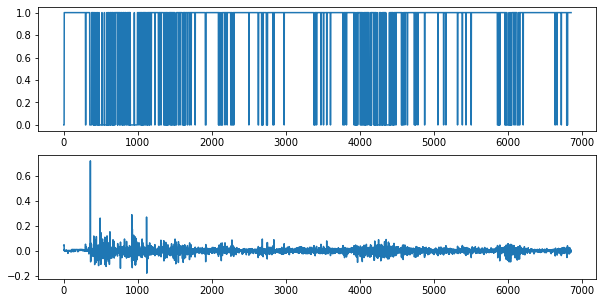

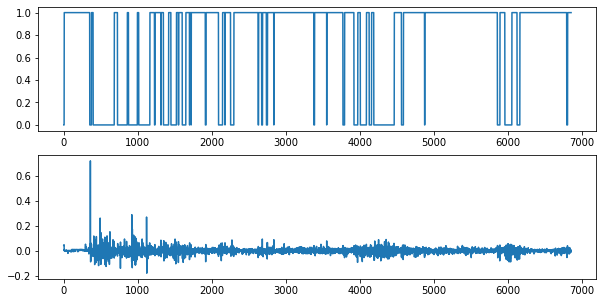

In [ ]:
hmm_plot(dfs, 'closingprice')

## 000004data

In [ ]:
dfs = pd.read_excel("000004data.xlsx")
dfs

,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,1991-01-02,16.7800,16.7800,16.7800,16.7800,23.0000,1.930000e+05
1,1991-01-10,16.2200,16.2200,16.2200,16.2200,1.0000,8.000000e+03
2,1991-01-14,15.9800,15.9800,15.9800,15.9800,1.0000,8.000000e+03
3,1991-01-15,15.9000,15.9000,15.9000,15.9000,1.0000,8.000000e+03
4,1991-01-17,15.7400,15.7400,15.7400,15.7400,1.0000,8.000000e+03
...,...,...,...,...,...,...,...
6479,2018-12-21,128.8267,129.7412,126.7482,127.5796,278.6859,3.774242e+06
6480,2018-12-24,127.7459,129.4918,125.9999,129.0761,277.4831,3.780082e+06
6481,2018-12-25,128.8267,128.8267,124.6697,126.7482,276.0397,3.701756e+06
6482,2018-12-26,126.8313,129.0761,126.6650,127.9121,196.5355,2.656151e+06


In [ ]:
labeling_plot(dfs,'closingprice' , 'DATE', 10, 5500)

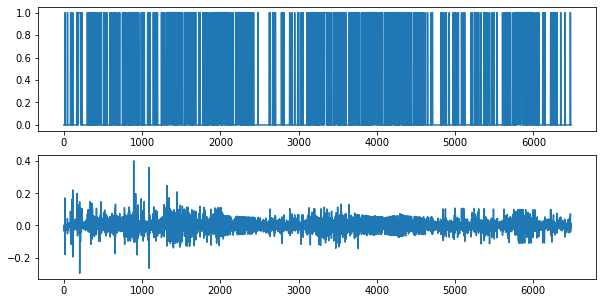

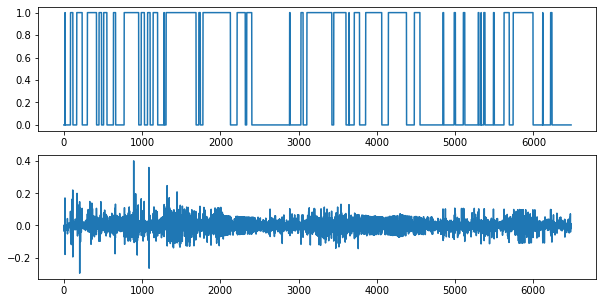

In [ ]:
hmm_plot(dfs, 'closingprice')

## 399001data

In [ ]:
dfs = pd.read_excel("399001data.xlsx")
dfs

,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,1991-04-03,988.05,988.05,988.05,988.05,1,10000
1,1991-04-04,983.11,983.11,983.11,983.11,523,761000
2,1991-04-05,978.27,978.27,978.27,978.27,107,150000
3,1991-04-06,973.42,973.42,973.42,973.42,102,159000
4,1991-04-08,968.57,968.57,968.57,968.57,57,84000
...,...,...,...,...,...,...,...
6804,2018-12-21,7399.15,7405.27,7283.76,7337.60,161299104,134924468224
6805,2018-12-24,7315.26,7393.71,7293.15,7392.56,143855088,127564046336
6806,2018-12-25,7308.61,7362.07,7180.08,7332.35,196583472,161164247040
6807,2018-12-26,7323.99,7369.84,7277.56,7289.55,161333008,137367527424


In [ ]:
labeling_plot(dfs,'closingprice' , 'DATE', 10, 5500)

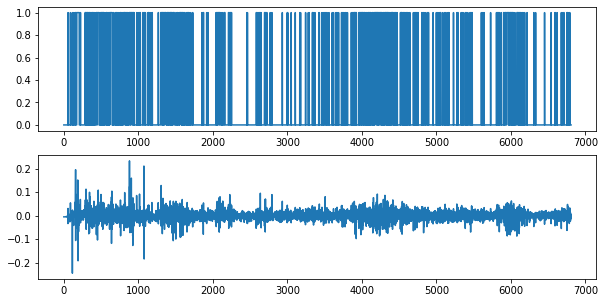

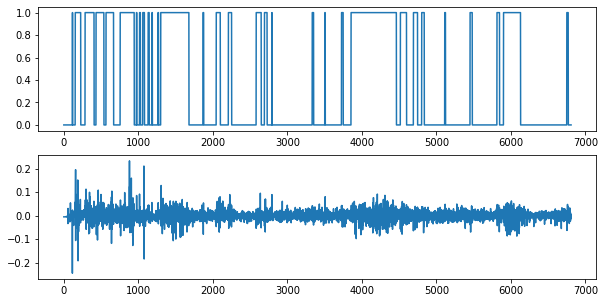

In [ ]:
hmm_plot(dfs, 'closingprice')

## 600601data

In [ ]:
dfs = pd.read_excel("600601data.xlsx")
dfs

,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,1990-12-19,185.3000,185.3000,185.3000,185.3000,50.0000,3.700000e+04
1,1990-12-20,185.3000,194.6000,185.3000,194.6000,21.0000,1.600000e+04
2,1990-12-21,204.3000,204.3000,204.3000,204.3000,8.0000,6.000000e+03
3,1990-12-26,236.5000,236.5000,236.5000,236.5000,2.0000,1.000000e+03
4,1990-12-28,238.9000,238.9000,238.9000,238.9000,5.0000,4.000000e+03
...,...,...,...,...,...,...,...
6727,2018-12-21,16293.7157,16407.7813,16065.5845,16293.7157,3.7707,8.852586e+07
6728,2018-12-24,16293.7157,16521.8469,16065.5845,16407.7813,2.9126,7.211278e+07
6729,2018-12-25,16179.6501,16179.6501,14924.9285,15723.3877,7.6241,1.619423e+08
6730,2018-12-26,15723.3877,15837.4533,15381.1909,15609.3221,3.4680,8.251728e+07


In [ ]:
labeling_plot(dfs,'closingprice' , 'DATE', 10, 5500)

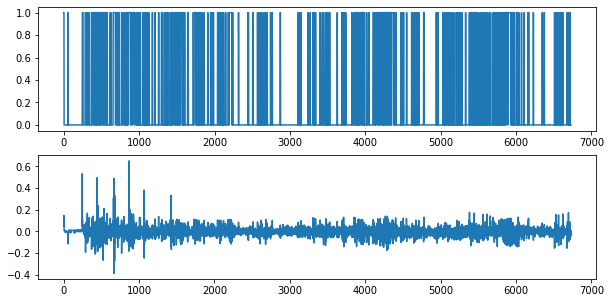

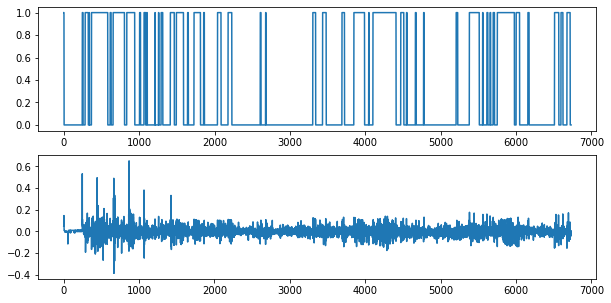

In [ ]:
hmm_plot(dfs, 'closingprice')

## 600615data

In [ ]:
dfs = pd.read_excel("600615data.xlsx")
dfs

,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,1992-09-10,141.0000,172.0000,125.5000,169.5000,20584.0000,3.142000e+07
1,1992-09-11,172.5000,195.5000,168.0000,181.5000,10376.0000,1.859800e+07
2,1992-09-14,181.0000,189.5000,156.5000,170.0000,10660.0000,1.872600e+07
3,1992-09-15,165.0000,177.9300,155.5000,172.0000,6640.0000,1.126500e+07
4,1992-09-16,172.0000,188.5000,172.0000,179.0000,6084.0000,1.081200e+07
...,...,...,...,...,...,...,...
5974,2018-12-21,604.5669,610.9812,592.4509,601.0034,115.0688,8.222198e+06
5975,2018-12-24,596.7272,623.0972,596.7272,618.8210,198.0345,1.434707e+07
5976,2018-12-25,618.8210,625.9480,601.7161,618.1083,264.5698,1.923856e+07
5977,2018-12-26,607.4177,635.2132,607.4177,626.6607,249.6829,1.845371e+07


In [ ]:
labeling_plot(dfs,'closingprice' , 'DATE', 10, 5500)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log



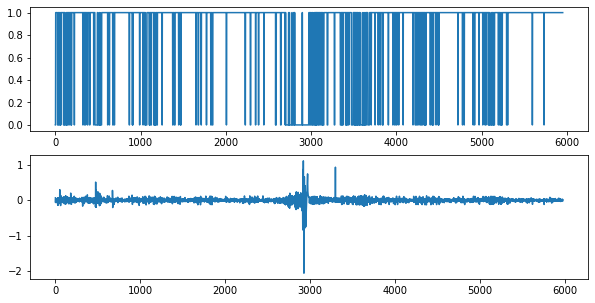

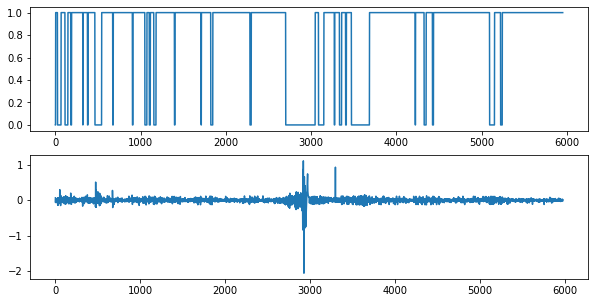

In [ ]:
hmm_plot(dfs, 'closingprice')

## Tesla

In [ ]:
dfs = pd.read_csv("Tesla.csv")
dfs

,Date,Close/Last,Volume,Open,High,Low
0,08/03/2021,$709.74,21620250,$719,$722.65,$701.01
1,08/02/2021,$709.67,33615770,$700,$726.94,$698.4
2,07/30/2021,$687.2,29656410,$671.758,$697.53,$669
3,07/29/2021,$677.35,30394640,$649.79,$683.69,$648.8
4,07/28/2021,$646.98,16006600,$646.995,$654.9699,$639.4001
...,...,...,...,...,...,...
2511,08/10/2011,$4.764,7820735,$5.088,$5.088,$4.726
2512,08/09/2011,$5.012,6666910,$4.83,$5.09,$4.74
2513,08/08/2011,$4.728,13042360,$4.62,$4.888,$4.62
2514,08/05/2011,$4.848,9821880,$4.998,$5.076,$4.566


In [ ]:
dfs['Close/Last'] = np.array([float(x[1:]) for x in dfs['Close/Last']])
dfs

,Date,Close/Last,Volume,Open,High,Low
0,08/03/2021,709.740,21620250,$719,$722.65,$701.01
1,08/02/2021,709.670,33615770,$700,$726.94,$698.4
2,07/30/2021,687.200,29656410,$671.758,$697.53,$669
3,07/29/2021,677.350,30394640,$649.79,$683.69,$648.8
4,07/28/2021,646.980,16006600,$646.995,$654.9699,$639.4001
...,...,...,...,...,...,...
2511,08/10/2011,4.764,7820735,$5.088,$5.088,$4.726
2512,08/09/2011,5.012,6666910,$4.83,$5.09,$4.74
2513,08/08/2011,4.728,13042360,$4.62,$4.888,$4.62
2514,08/05/2011,4.848,9821880,$4.998,$5.076,$4.566


In [ ]:
labeling_plot(dfs,'Close/Last' , 'Date', 10, 2000)

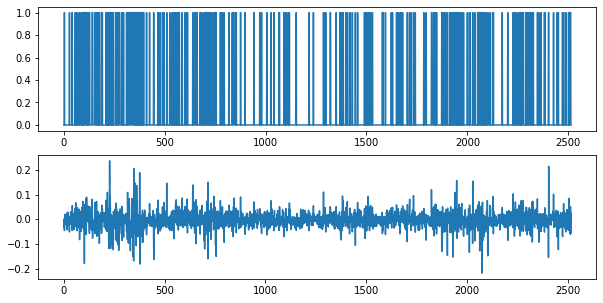

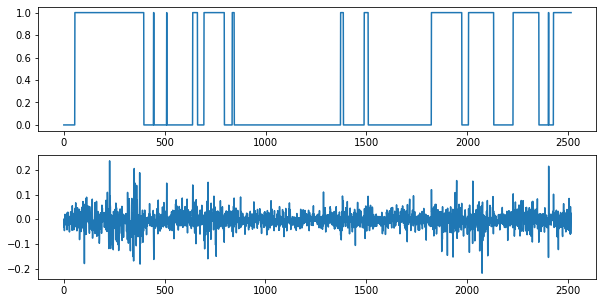

In [ ]:
hmm_plot(dfs, 'Close/Last')

## LIVE

In [ ]:
dfs = pd.read_csv("LIVE.csv")
dfs

,Date,Close/Last,Volume,Open,High,Low
0,08/03/2021,$62.58,26605.0,$60,$64.98,$60
1,08/02/2021,$64.22,4358.0,$63.7,$64.38,$62.69
2,07/30/2021,$63.8,8099.0,$64.8059,$64.8059,$62.245
3,07/29/2021,$64.025,6751.0,$62.73,$65.7999,$62.73
4,07/28/2021,$62.58,27702.0,$63.9,$66.48,$61.66
...,...,...,...,...,...,...
2511,08/10/2011,$4.2799,2533.0,$3.6599,$4.7399,$3.4199
2512,08/09/2011,$3.5599,560.0,$3.9799,$3.9799,$3.5599
2513,08/08/2011,$3.5599,818.0,$4.0199,$4.0201,$3.5599
2514,08/05/2011,$4.1999,494.0,$4.2599,$4.2599,$4.1399


In [ ]:
dfs['Close/Last'] = np.array([float(x[1:]) for x in dfs['Close/Last']])
dfs

,Date,Close/Last,Volume,Open,High,Low
0,08/03/2021,62.5800,26605.0,$60,$64.98,$60
1,08/02/2021,64.2200,4358.0,$63.7,$64.38,$62.69
2,07/30/2021,63.8000,8099.0,$64.8059,$64.8059,$62.245
3,07/29/2021,64.0250,6751.0,$62.73,$65.7999,$62.73
4,07/28/2021,62.5800,27702.0,$63.9,$66.48,$61.66
...,...,...,...,...,...,...
2511,08/10/2011,4.2799,2533.0,$3.6599,$4.7399,$3.4199
2512,08/09/2011,3.5599,560.0,$3.9799,$3.9799,$3.5599
2513,08/08/2011,3.5599,818.0,$4.0199,$4.0201,$3.5599
2514,08/05/2011,4.1999,494.0,$4.2599,$4.2599,$4.1399


In [ ]:
labeling_plot(dfs,'Close/Last' , 'Date', 10, 2000)

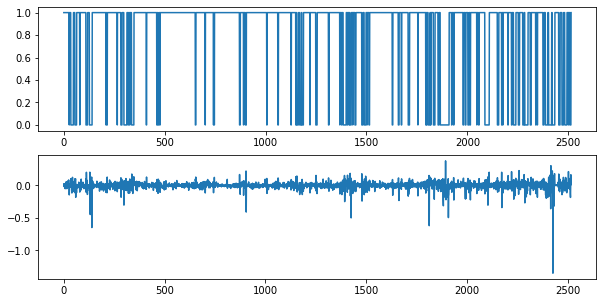

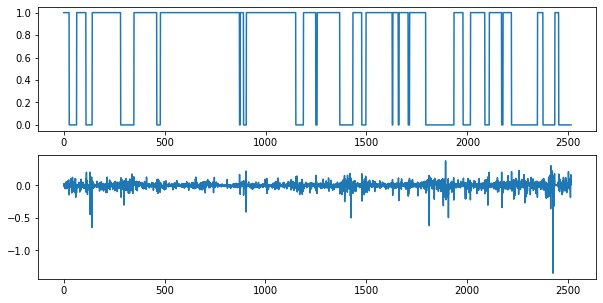

In [ ]:
hmm_plot(dfs, 'Close/Last')

## DATA_newVersion

In [ ]:
dfs = pd.read_excel("DATA_newVersion.xlsx")
dfs

,USD to Rial,Date-S,Date-M,OPEC,Gold,X50C,TEPIX,IND,FSTM,SCNDM,AZDSH,FLZT,Chemic,Cement,Drug,Khodro,Banks,Food,Insurance,Oil Products
0,10486,1389/05/24,2010-08-15,72.64,1224.500000,19910.2,16701.1,12814.4,13768.1,24119.7,21274.7,8345.6,595.1,191.6,1006.3,5471.3,220.3,559.6,2608.9,31196.0
1,10462,1389/05/25,2010-08-16,72.27,1224.500000,19918.5,16766.9,12930.9,13878.7,24386.2,21493.0,8458.6,594.3,191.3,1006.1,5484.9,221.0,561.8,2688.9,31114.5
2,10443,1389/05/26,2010-08-17,73.25,1226.599976,20116.2,16910.8,12978.6,13974.5,24412.5,21622.0,8535.1,593.6,191.3,1007.1,5653.1,222.2,564.8,2748.7,31089.7
3,10450,1389/05/27,2010-08-18,73.05,1229.699951,20292.2,17009.6,12930.8,13955.1,24288.0,21558.1,8529.4,594.1,191.4,1019.8,5789.0,225.6,564.9,2817.4,31502.9
4,10460,1389/05/28,2010-08-19,73.03,1233.800049,20292.2,17009.6,12930.8,13955.1,24288.0,21558.1,8529.4,594.1,191.4,1019.8,5789.0,225.6,564.9,2817.4,31502.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,213020,1399/05/11,2020-08-01,43.02,1962.800049,77430.1,1961621.8,1746720.0,1439790.0,3941960.0,2535570.0,1301190.0,97640.8,13461.3,163871.0,602740.0,10023.1,81109.4,85375.0,9368200.0
3138,217020,1399/05/12,2020-08-02,43.02,1998.000000,79555.9,2011524.3,1792200.0,1468570.0,4074200.0,2592790.0,1327710.0,101256.0,13400.5,168049.0,614350.0,10189.9,82178.6,88497.0,9441890.0
3139,218990,1399/05/13,2020-08-03,44.02,1966.000000,78605.0,1993340.2,1774950.0,1444220.0,4082440.0,2567080.0,1289560.0,101157.0,13133.5,168816.0,598425.0,10114.5,81357.8,90907.7,9209470.0
3140,222960,1399/05/14,2020-08-04,44.27,2001.199951,78515.6,1995044.4,1773820.0,1435450.0,4126680.0,2564400.0,1270060.0,103314.0,13064.6,168780.0,580279.0,10211.8,82282.1,94565.2,8985770.0


### OPEC

In [ ]:
labeling_plot(dfs,'OPEC' , 'Date-S', 10, 2600)

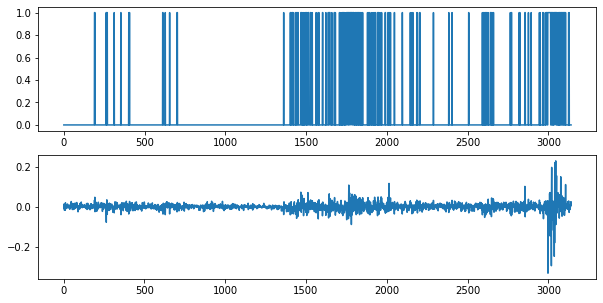

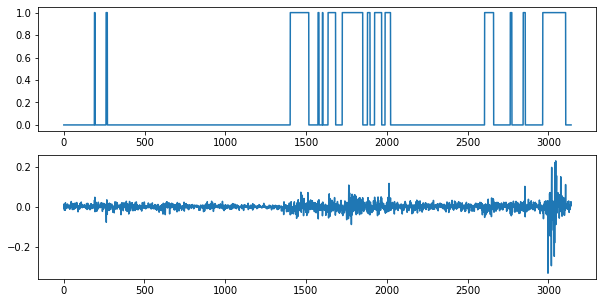

In [ ]:
hmm_plot(dfs, 'OPEC')

### Khodro

In [ ]:
labeling_plot(dfs,'Khodro' , 'Date-S', 10, 2600)

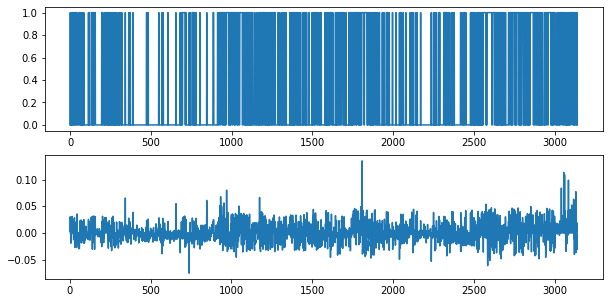

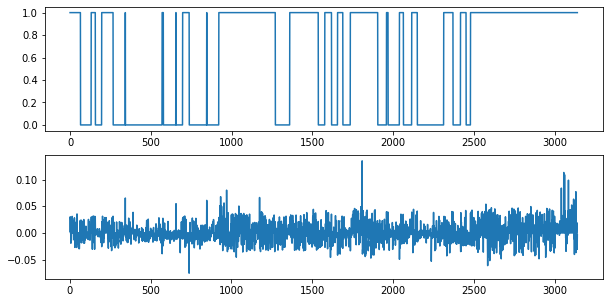

In [ ]:
hmm_plot(dfs, 'Khodro')

## BTC

In [ ]:
dfs = pd.read_csv("BTC_Daily.csv")
dfs

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 05, 2021","40,947.2","39,734.4","41,366.3","37,365.4",88.63K,3.05%
1,"Aug 04, 2021","39,736.9","38,188.4","39,956.5","37,556.0",79.22K,4.21%
2,"Aug 03, 2021","38,130.3","39,167.4","39,766.6","37,688.2",0.26K,-2.65%
3,"Aug 02, 2021","39,168.4","39,869.8","40,449.0","38,692.5",74.81K,-1.78%
4,"Aug 01, 2021","39,878.3","41,510.0","42,565.0","39,556.5",80.33K,-4.03%
...,...,...,...,...,...,...,...
1488,"Jul 09, 2017","2,511.4","2,564.9","2,576.7","2,509.6",39.16K,-2.08%
1489,"Jul 08, 2017","2,564.9","2,513.9","2,568.7","2,480.6",54.51K,2.03%
1490,"Jul 07, 2017","2,513.9","2,614.2","2,617.5","2,484.7",90.45K,-3.84%
1491,"Jul 06, 2017","2,614.2","2,627.9","2,634.8","2,581.8",60.16K,-0.52%


In [ ]:
dfs['Price'] = np.array([float(x.replace(',', '')) for x in dfs['Price']])
dfs

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 05, 2021",40947.2,"39,734.4","41,366.3","37,365.4",88.63K,3.05%
1,"Aug 04, 2021",39736.9,"38,188.4","39,956.5","37,556.0",79.22K,4.21%
2,"Aug 03, 2021",38130.3,"39,167.4","39,766.6","37,688.2",0.26K,-2.65%
3,"Aug 02, 2021",39168.4,"39,869.8","40,449.0","38,692.5",74.81K,-1.78%
4,"Aug 01, 2021",39878.3,"41,510.0","42,565.0","39,556.5",80.33K,-4.03%
...,...,...,...,...,...,...,...
1488,"Jul 09, 2017",2511.4,"2,564.9","2,576.7","2,509.6",39.16K,-2.08%
1489,"Jul 08, 2017",2564.9,"2,513.9","2,568.7","2,480.6",54.51K,2.03%
1490,"Jul 07, 2017",2513.9,"2,614.2","2,617.5","2,484.7",90.45K,-3.84%
1491,"Jul 06, 2017",2614.2,"2,627.9","2,634.8","2,581.8",60.16K,-0.52%


In [ ]:
labeling_plot(dfs,'Price' , 'Date', 10, 1200)

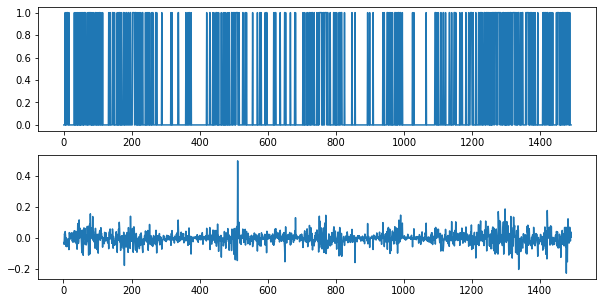

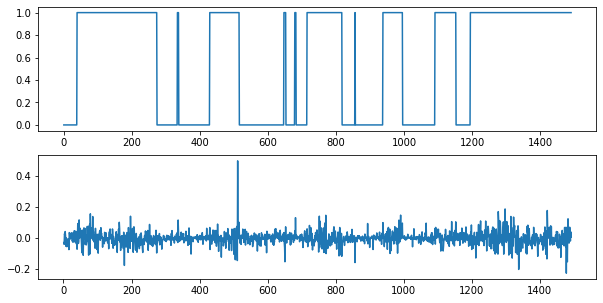

In [ ]:
hmm_plot(dfs, 'Price')

## ETH

In [ ]:
dfs = pd.read_csv("ETH_Daily.csv")
dfs

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 05, 2021","2,808.77","2,725.28","2,822.66","2,533.51",1.69M,3.06%
1,"Aug 04, 2021","2,725.29","2,506.50","2,766.46","2,462.32",1.23M,8.72%
2,"Aug 03, 2021","2,506.65","2,608.01","2,631.43","2,445.49",158.45K,-3.89%
3,"Aug 02, 2021","2,608.04","2,556.07","2,664.73","2,513.51",970.67K,2.03%
4,"Aug 01, 2021","2,556.23","2,530.94","2,696.38","2,515.26",1.20M,0.95%
...,...,...,...,...,...,...,...
1488,"Jul 09, 2017",234.97,245.23,249.00,234.15,201.47K,-4.18%
1489,"Jul 08, 2017",245.23,238.38,246.66,226.68,365.16K,2.87%
1490,"Jul 07, 2017",238.38,265.35,265.80,233.84,496.51K,-10.16%
1491,"Jul 06, 2017",265.35,264.77,273.00,258.37,240.42K,0.22%


In [ ]:
dfs['Price'] = np.array([float(x.replace(',', '')) for x in dfs['Price']])
dfs

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 05, 2021",2808.77,"2,725.28","2,822.66","2,533.51",1.69M,3.06%
1,"Aug 04, 2021",2725.29,"2,506.50","2,766.46","2,462.32",1.23M,8.72%
2,"Aug 03, 2021",2506.65,"2,608.01","2,631.43","2,445.49",158.45K,-3.89%
3,"Aug 02, 2021",2608.04,"2,556.07","2,664.73","2,513.51",970.67K,2.03%
4,"Aug 01, 2021",2556.23,"2,530.94","2,696.38","2,515.26",1.20M,0.95%
...,...,...,...,...,...,...,...
1488,"Jul 09, 2017",234.97,245.23,249.00,234.15,201.47K,-4.18%
1489,"Jul 08, 2017",245.23,238.38,246.66,226.68,365.16K,2.87%
1490,"Jul 07, 2017",238.38,265.35,265.80,233.84,496.51K,-10.16%
1491,"Jul 06, 2017",265.35,264.77,273.00,258.37,240.42K,0.22%


In [ ]:
labeling_plot(dfs,'Price' , 'Date', 10, 1200)

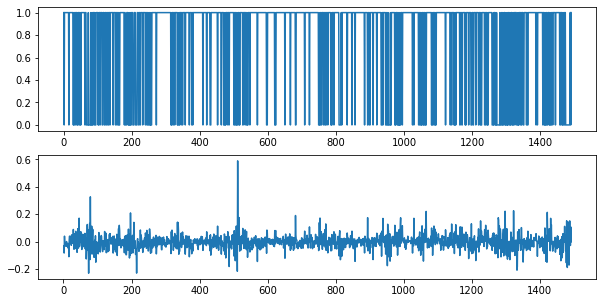

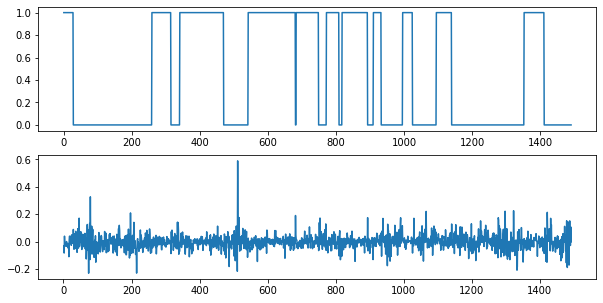

In [ ]:
hmm_plot(dfs, 'Price')

## ADA

In [ ]:
dfs = pd.read_csv("ADA_Daily.csv")
dfs

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 05, 2021",1.390020,1.375899,1.397226,1.338999,269.47M,1.03%
1,"Aug 04, 2021",1.375899,1.364798,1.392984,1.323706,325.17M,0.81%
2,"Aug 03, 2021",1.364798,1.308642,1.382237,1.262617,-,4.29%
3,"Aug 02, 2021",1.308646,1.314328,1.348538,1.296125,231.98M,-0.58%
4,"Aug 01, 2021",1.316261,1.317785,1.386836,1.299556,328.16M,-0.02%
...,...,...,...,...,...,...,...
1309,"Jan 04, 2018",1.104300,1.100000,1.350000,1.050000,19.60M,2.25%
1310,"Jan 03, 2018",1.080000,0.978180,1.090000,0.888210,20.23M,41.73%
1311,"Jan 02, 2018",0.762000,0.702200,0.800000,0.675000,10.97M,8.52%
1312,"Jan 01, 2018",0.702200,0.710000,0.715000,0.632000,17.95M,-1.10%


In [ ]:
labeling_plot(dfs,'Price' , 'Date', 10, 1000)

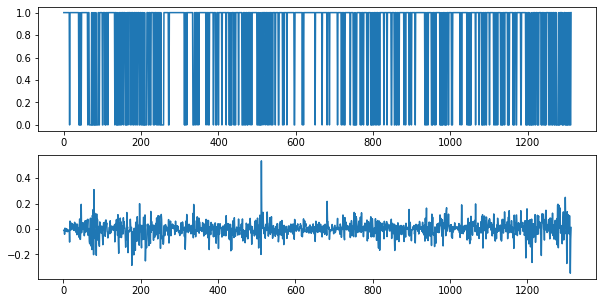

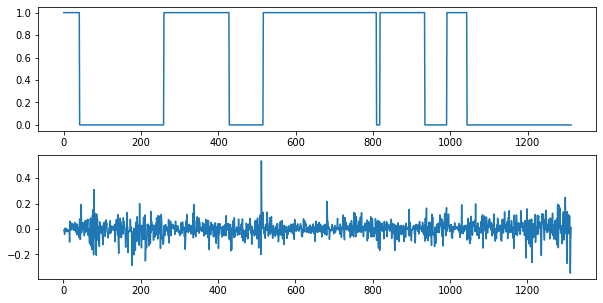

In [ ]:
hmm_plot(dfs, 'Price')

## Results

In [ ]:
results = pd.read_csv("results.csv")

In [ ]:
results

,MI,Model,Name,Perc,acc,f1,recal
0,0.060884,LSTM,Tesla,0.619469,0.665823,0.679612,0.752688
1,0.065144,GRU,Tesla,0.622807,0.670886,0.685990,0.763441
2,0.045411,XGBoost,Tesla,0.568058,0.624051,0.678223,0.841398
3,0.096797,LSTM with 44 previous data,Tesla,0.747440,0.715984,0.670750,0.608333
4,0.112927,GRU with 44 previous data,Tesla,0.712366,0.733157,0.724044,0.736111
5,0.105471,XGBoost with 44 previous data,Tesla,0.701058,0.725231,0.718157,0.736111
6,0.046708,LSTM,LIVE,0.570033,0.670886,0.573770,0.577558
7,0.052866,GRU,LIVE,0.569697,0.674684,0.593997,0.620462
8,0.045725,XGBoost,LIVE,0.634146,0.686076,0.511811,0.429043
9,0.075432,LSTM with 44 previous data,LIVE,0.738255,0.737120,0.525060,0.407407


In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Tesla

In [ ]:
tesla = results.loc[results['Name'] == 'Tesla']
tesla.Model

0                             LSTM
1                              GRU
2                          XGBoost
3       LSTM with 44 previous data
4        GRU with 44 previous data
5    XGBoost with 44 previous data
Name: Model, dtype: object

In [ ]:
tesla

,MI,Model,Name,Perc,acc,f1,recal
0,0.060884,LSTM,Tesla,0.619469,0.665823,0.679612,0.752688
1,0.065144,GRU,Tesla,0.622807,0.670886,0.685990,0.763441
2,0.045411,XGBoost,Tesla,0.568058,0.624051,0.678223,0.841398
3,0.096797,LSTM with 44 previous data,Tesla,0.747440,0.715984,0.670750,0.608333
4,0.112927,GRU with 44 previous data,Tesla,0.712366,0.733157,0.724044,0.736111
5,0.105471,XGBoost with 44 previous data,Tesla,0.701058,0.725231,0.718157,0.736111


In [ ]:
list(tesla)[3:]

['Perc', 'acc', 'f1', 'recal']

colors:
 LSTM(blue)
 GRU(green)
 XGBoost(red) 
 LSTM with 44 previous data(cyan)
 GRU with 44 previous data(magenta)
 XGBoost with 44 previous data(yellow)



[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

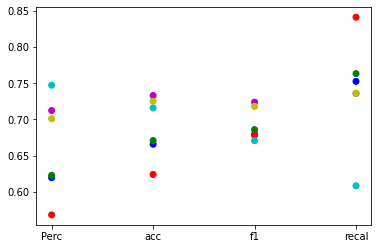

In [ ]:
# Tesla

colors = ['b','g','r','c','m','y']
print('colors:\n LSTM(blue)\n GRU(green)\n XGBoost(red) ')
print(' LSTM with 44 previous data(cyan)\n GRU with 44 previous data(magenta)')
print(' XGBoost with 44 previous data(yellow)\n')
y=[tesla['Perc'],tesla['acc'],tesla['f1'],tesla['recal']]
x=[1,2,3,4]
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### LIVE

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

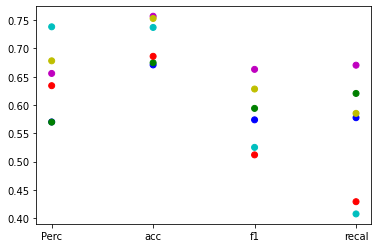

In [ ]:
# LIVE
LIVE = results.loc[results['Name'] == 'LIVE']

colors = ['b','g','r','c','m','y']
y=[LIVE['Perc'],LIVE['acc'],LIVE['f1'],LIVE['recal']]
x=[1,2,3,4]
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 000001

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

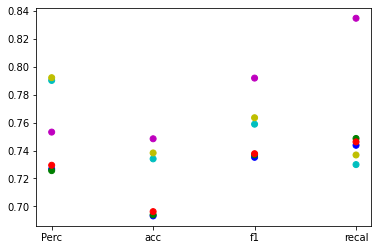

In [ ]:
# 001
data_001 = results.loc[results['Name'] == '001']

colors = ['b','g','r','c','m','y']
y=[data_001['Perc'],data_001['acc'],data_001['f1'],data_001['recal']]
x=[1,2,3,4]
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 000004

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

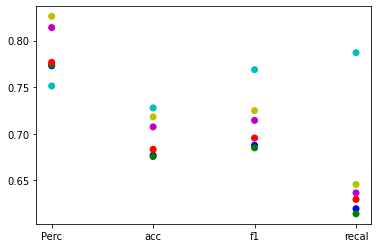

In [ ]:
# 004
data_004 = results.loc[results['Name'] == '004']

colors = ['b','g','r','c','m','y']
y=[data_004['Perc'],data_004['acc'],data_004['f1'],data_004['recal']]
x=[1,2,3,4]
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 399001

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

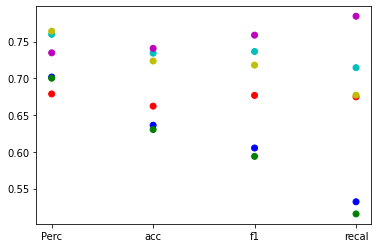

In [ ]:
# 99001
data_99001 = results.loc[results['Name'] == '99001']

colors = ['b','g','r','c','m','y']
y=[data_99001['Perc'],data_99001['acc'],data_99001['f1'],data_99001['recal']]
x=[1,2,3,4]
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 600601

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

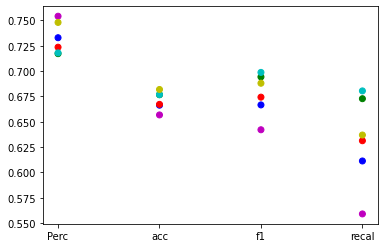

In [ ]:
# 601
data_601 = results.loc[results['Name'] == '601']

colors = ['b','g','r','c','m','y']
y=[data_601['Perc'],data_601['acc'],data_601['f1'],data_601['recal']]
x=[1,2,3,4]
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 600615

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

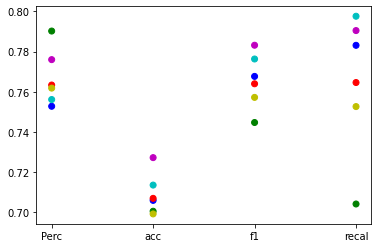

In [ ]:
# 615
data_615 = results.loc[results['Name'] == '615']

colors = ['b','g','r','c','m','y']
y=[data_615['Perc'],data_615['acc'],data_615['f1'],data_615['recal']]
x=[1,2,3,4]
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])